<a href="https://colab.research.google.com/github/AFKKZ/Traffic-Sign-Detection-in-Road-Videos/blob/main/DIP_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video

In [ ]:
import cv2
import numpy as np
import os

In [ ]:
#Paths for input and output videos
input_path = '/content/task1.mp4'
output_path = '/content/task1_output_sample.mp4'
template_path = '/content/Traffic_signs_filter'

#Open the video capture
cap = cv2.VideoCapture(input_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

#Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

#Add Student ID to the video
text = "522K0019_522K0022_522K0034"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]

#Position text at the top-right corner
text_x = width - text_size[0] - 10
text_y = text_size[1] + 10

#Adjusted color ranges for red and blue
lower_red1 = np.array([0, 80, 80])
upper_red1 = np.array([15, 255, 255])
lower_red2 = np.array([160, 80, 80])
upper_red2 = np.array([179, 255, 255])
lower_blue = np.array([90, 150, 100])
upper_blue = np.array([130, 255, 255])

#Shape filtering parameters
min_area = 500  #Minimum contour area to consider
circularity_threshold = 0.7  #Threshold for circularity to detect circular signs

#Load traffic sign templates dynamically from the template folder
templates = []
template_names = []

for filename in os.listdir(template_path):
  #Check if the file is an image
  if filename.endswith(('.jpg')):
    template_img = cv2.imread(os.path.join(template_path, filename), 0)
    if template_img is not None:
      templates.append(template_img)
      template_names.append(filename)

#Function for template matching
def match_template(roi):
  for i, template in enumerate(templates):
    h, w = template.shape
    roi_resized = cv2.resize(roi, (w, h))  #Resize ROI to match template size
    res = cv2.matchTemplate(roi_resized, template, cv2.TM_CCOEFF_NORMED)
    max_val = cv2.minMaxLoc(res)[1]
    if max_val > 0.7:
      print(f"Template matched: {template_names[i]} with score {max_val}")
      return True
  return False

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  #Apply bilateral filter to reduce noise while keeping edges sharp
  filtered_frame = cv2.bilateralFilter(frame, d=9, sigmaColor=75, sigmaSpace=75)

  #Convert the frame to HSV
  hsv_frame = cv2.cvtColor(filtered_frame, cv2.COLOR_BGR2HSV)

  #Apply color masks for red and blue
  red_mask1 = cv2.inRange(hsv_frame, lower_red1, upper_red1)
  red_mask2 = cv2.inRange(hsv_frame, lower_red2, upper_red2)
  red_mask = cv2.bitwise_or(red_mask1, red_mask2)
  blue_mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)

  #Apply morphological operations to reduce noise and fill gaps
  kernel = np.ones((7, 7), np.uint8)
  red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)
  blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, kernel)

  #Find contours for red and blue masks
  contours_red, _ = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours_blue, _ = cv2.findContours(blue_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  #Function to filter contours by shape
  def is_circular(contour):
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    if perimeter == 0:
      return False
    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    return circularity > circularity_threshold

  #Process red contours
  for contour in contours_red:
    if cv2.contourArea(contour) > min_area and is_circular(contour):
      x, y, w, h = cv2.boundingRect(contour)
      roi = frame[y:y+h, x:x+w]
      roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
      if match_template(roi_gray):
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

  #Process blue contours
  for contour in contours_blue:
    if cv2.contourArea(contour) > min_area and is_circular(contour):
      x, y, w, h = cv2.boundingRect(contour)
      roi = frame[y:y+h, x:x+w]
      roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
      if match_template(roi_gray):
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

  cv2.putText(frame, text, (text_x, text_y), font, font_scale, (255, 0, 0), font_thickness)
  #Write the processed frame to the output video
  out.write(frame)

#Release the video objects
cap.release()
out.release()

print("Processing complete. Output saved to", output_path)

Template matched: traffic_sign_39.jpg with score 0.8697137236595154
Template matched: traffic_sign_39.jpg with score 0.8983470797538757
Template matched: traffic_sign_39.jpg with score 0.8596417307853699
Template matched: traffic_sign_39.jpg with score 0.8645234107971191
Template matched: traffic_sign_39.jpg with score 0.8805254101753235
Template matched: traffic_sign_39.jpg with score 0.8720105290412903
Template matched: traffic_sign_39.jpg with score 0.8984013795852661
Template matched: traffic_sign_39.jpg with score 0.8974938988685608
Template matched: traffic_sign_39.jpg with score 0.8744507431983948
Template matched: traffic_sign_39.jpg with score 0.871518611907959
Template matched: traffic_sign_39.jpg with score 0.8693535923957825
Template matched: traffic_sign_39.jpg with score 0.8895957469940186
Template matched: traffic_sign_39.jpg with score 0.9049448370933533
Template matched: traffic_sign_39.jpg with score 0.8846350908279419
Template matched: traffic_sign_39.jpg with score 

Testing for color range

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/signs_4.jpg'
image = cv2.imread(image_path)

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for red (two ranges to cover red hue spectrum)
lower_red1 = np.array([0, 90, 70])
upper_red1 = np.array([15, 255, 255])
lower_red2 = np.array([165, 90, 70])
upper_red2 = np.array([179, 255, 255])

# Define color range for blue
lower_blue = np.array([100, 150, 100])
upper_blue = np.array([130, 255, 255])

# Create masks for red and blue
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)  # Combine the two red masks

blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Display the masks for testing
cv2_imshow(red_mask)
cv2_imshow(blue_mask)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


#Programming Task 2


Original:


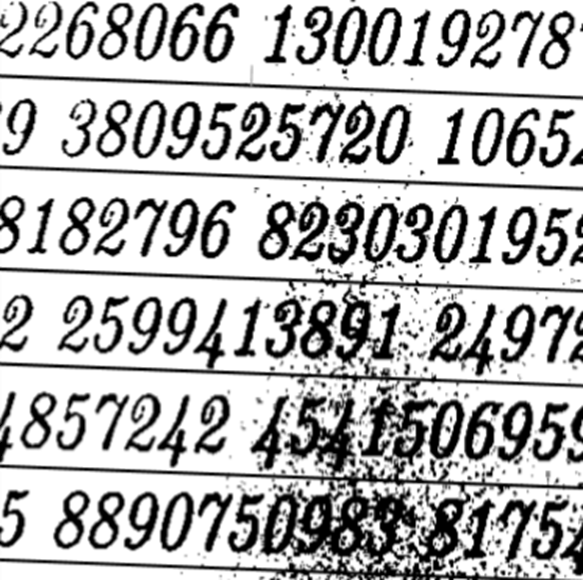


Noise 0:


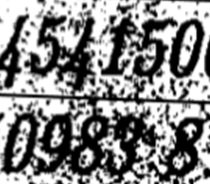


Noise 1:


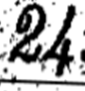


Noise 2:


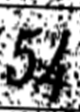


Noise 3:


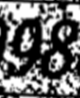


Noise 4:


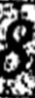


Noise 5:


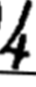



Threshed original:


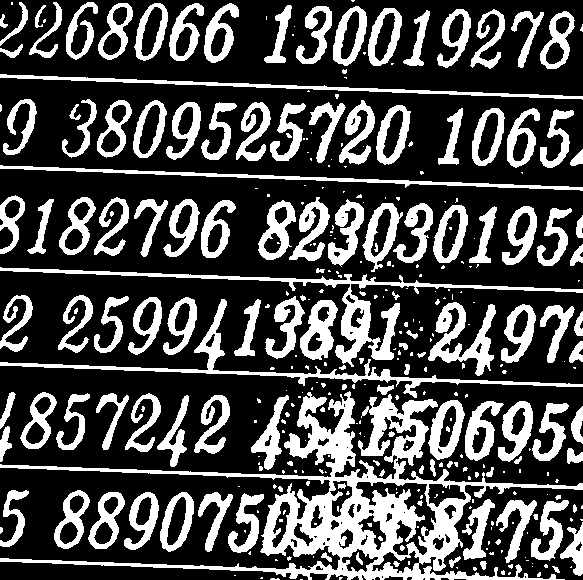



Thresh_noise 0 :


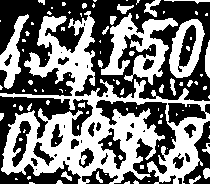



Thresh_noise 1 :


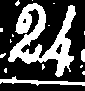



Thresh_noise 2 :


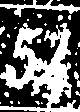



Thresh_noise 3 :


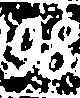



Thresh_noise 4 :


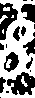



Thresh_noise 5 :


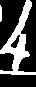

After Morphological Operations:

Opening:


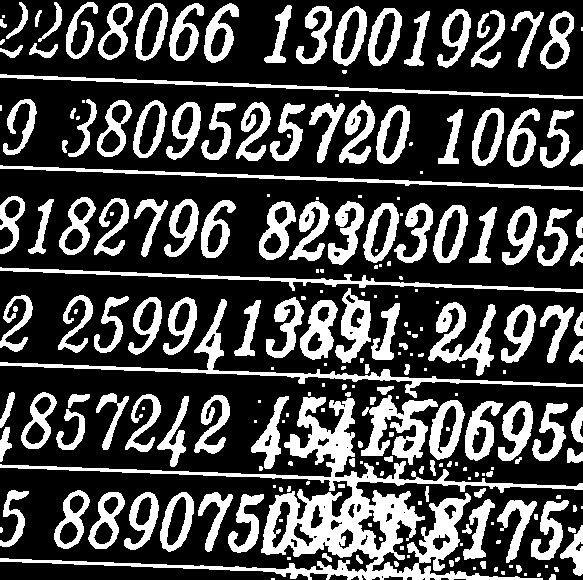



Closing:


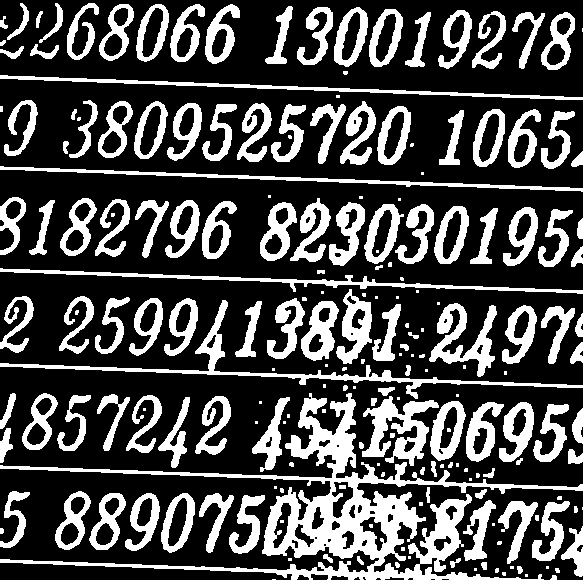



Dilated:


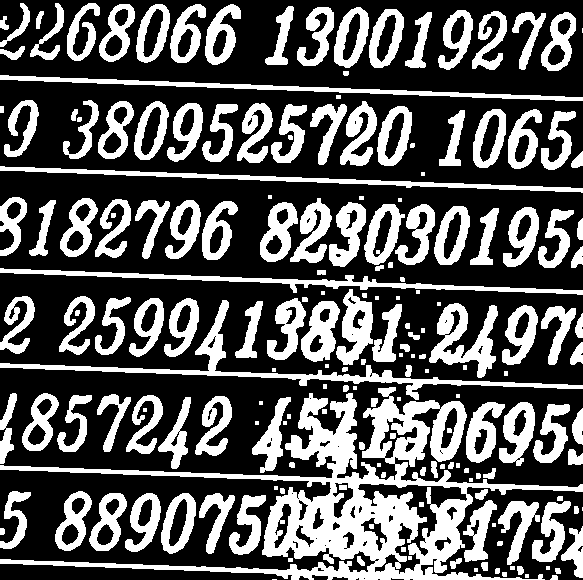


Noise 0 morphed:


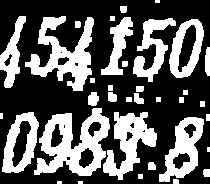


Noise 1 morphed:


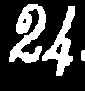


Noise 2 morphed:


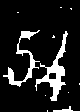


Noise 3 morphed:


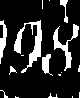


Noise 4 morphed:


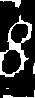


Noise 5 morphed:


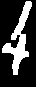

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image in grayscale
img = cv2.imread('input.png', 0)
print("\nOriginal:")
cv2_imshow(img)

#Crop out the special noise parts
print("\nNoise 0:")
noise_0 = img[381:565, 260:470]
cv2_imshow(noise_0)

print("\nNoise 1:")
noise_1 = img[299:390, 420:505]
cv2_imshow(noise_1)

print("\nNoise 2:")
noise_2 = img[369:481, 284:364]
cv2_imshow(noise_2)

print("\nNoise 3:")
noise_3 = img[477:575, 290:370]
cv2_imshow(noise_3)

print("\nNoise 4:")
noise_4 = img[477:575, 335:370]
cv2_imshow(noise_4)

print("\nNoise 5:")
noise_5 = img[299:386, 195:231]
cv2_imshow(noise_5)

#Apply binary thresholding with Otsu's method to segment the digits
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("\n\nThreshed original:")
cv2_imshow(thresh)

noise_array = [noise_0, noise_1, noise_2, noise_3, noise_4, noise_5]
thresh_noise_array = []
count = 0
for i in noise_array:
  ret, thresh_noise = cv2.threshold(i, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  print("\n\nThresh_noise",count,":")
  cv2_imshow(thresh_noise)
  thresh_noise_array.append(thresh_noise)
  count += 1

#Refine morphological operations for improved noise removal and better connection of digits
kernel_open = np.ones((0, 0), np.uint8)  # Smaller kernel for finer noise removal
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_open)
kernel_close = np.ones((2, 2), np.uint8)  # Larger kernel for closing gaps in digits
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_close)

#Additional dilation step to further close gaps in digits
kernel_dilated = np.ones((2, 2), np.uint8)
dilated = cv2.dilate(closing, kernel_dilated, iterations=1)

#Display the refined mask
print("After Morphological Operations:")
print("\nOpening:")
cv2_imshow(opening)
print("\n\nClosing:")
cv2_imshow(closing)
print("\n\nDilated:")
cv2_imshow(dilated)

#Noise_0 morphological operations
kernel_open = np.ones((5, 5), np.uint8)
noise_0_morphed = cv2.morphologyEx(thresh_noise_array[0], cv2.MORPH_OPEN, kernel_open)
print("\nNoise 0 morphed:")
cv2_imshow(noise_0_morphed)

#Noise_1 morphological operations
kernel_open = np.ones((5, 5), np.uint8)
noise_1_morphed = cv2.morphologyEx(thresh_noise_array[1], cv2.MORPH_OPEN, kernel_open)
print("\nNoise 1 morphed:")
cv2_imshow(noise_1_morphed)

#Noise_2 morphological operations
kernel_erode = np.ones((3, 3), np.uint8)
noise_2_morphed = cv2.erode(thresh_noise_array[2], kernel_erode, iterations=2)
print("\nNoise 2 morphed:")
cv2_imshow(noise_2_morphed)

#Noise_3 morphological operations
kernel_erode = np.ones((5, 2), np.uint8)
noise_3_morphed = cv2.erode(thresh_noise_array[3], kernel_erode, iterations=2)
print("\nNoise 3 morphed:")
cv2_imshow(noise_3_morphed)

#Noise_4 morphological operations
kernel_erode = np.ones((3, 3), np.uint8)
noise_4_morphed = cv2.erode(thresh_noise_array[4], kernel_erode, iterations=2)
print("\nNoise 4 morphed:")
cv2_imshow(noise_4_morphed)

#Noise_5 morphological operations
kernel_open = np.ones((5, 5), np.uint8)
noise_5_morphed = cv2.morphologyEx(thresh_noise_array[5], cv2.MORPH_OPEN, kernel_open)
print("\nNoise 5 morphed:")
cv2_imshow(noise_5_morphed)



Result:


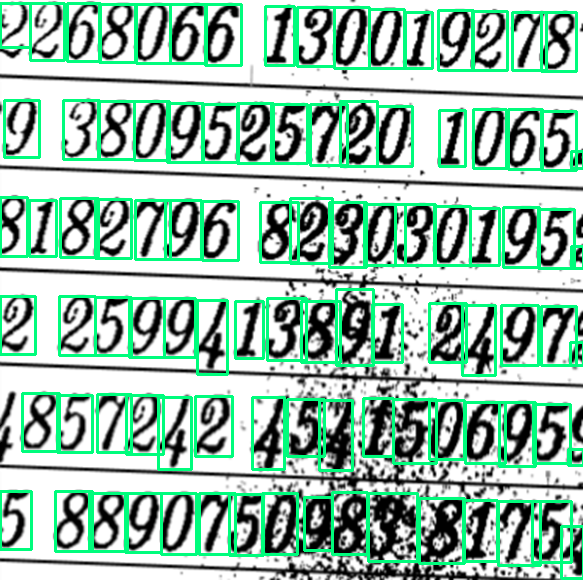

True

In [ ]:
#Merging the noise back into the image at the right coordinates
dilated[381:565, 260:470] = noise_0_morphed
dilated[299:390, 420:505] = noise_1_morphed
dilated[369:481, 284:364] = noise_2_morphed
dilated[477:575, 290:370] = noise_3_morphed
dilated[477:575, 335:370] = noise_4_morphed
dilated[299:386, 195:231] = noise_5_morphed

#Find contours on the cleaned mask
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Prepare the image for drawing bounding boxes
image_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

#Define size thresholds and aspect ratio thresholds for filtering contours
min_width, min_height = 10, 15
max_width, max_height = 100, 100
min_aspect_ratio, max_aspect_ratio = 0.3, 1.4

for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  aspect_ratio = w / float(h)
  #Apply width, height, and aspect ratio filters to target individual digits
  if (min_width < w < max_width and min_height < h < max_height and
  min_aspect_ratio < aspect_ratio < max_aspect_ratio):
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (124, 252, 0), 2)

#Display the final result with bounding boxes
print("\n\nResult:")
cv2_imshow(image_copy)

#Save the result into a file
cv2.imwrite('result.png', image_copy)